# Parabola exploration (test changes in ED library)

Created on Nov, 15, 2017
@author: Juan Manuel Acevedo Valle

In [1]:
import datetime, os

from parabola_configurations import model_, comp_func
from exploration.systems.parabola import ParabolicRegion as System
from exploration.systems.parabola import Instructor
from exploration.algorithm.algorithm_2017 import Algorithm as Algorithm
from exploration.algorithm.evaluation import Evaluation
from exploration.data.PlotTools import *
from exploration.algorithm.utils.functions import generate_motor_grid
from igmm import DynamicParameter

import numpy as np

class OBJECT(object):
    def __init__(self):
        pass

In [2]:
now = datetime.datetime.now().strftime("%Y_%m_%d_%H_%M_%S_")
file_prefix = 'test/test_' + now
file_prefix = file_prefix.replace('/',os.sep)
proprio, mode = True, 'social'

f_im_key, f_sm_key, f_cons_key = 'explauto_im', 'igmm_sm','explauto_cons'

val1_name, val1_file = 'whole', '../../systems/datasets/parabola_v2_dataset.h5'
val2_name, val2_file = 'social', '../../systems/datasets/instructor_parabola_1.h5'

val1_file = val1_file.replace('/',os.sep)
val2_file = val2_file.replace('/',os.sep)

# To guarantee reproducible experiments
random_seed = 12455 # 12455   #1234
thres_slope= 1.

n_initialization, n_experiments, n_save_data, eval_step \
                                    = 100, 20000, -1, 500
# n_save_data np.nan to not save, -1 to save 5 times during exploration

# Creating Agent ##
system, instructor = System(), Instructor(thresh_slope=thres_slope)

# Creating models ##
models = OBJECT()
models.f_sm = model_(f_sm_key, system)
models.f_cons = model_(f_cons_key, system)
models.f_im = model_(f_im_key, system)


models.f_sm.set_forgetting_factor(DynamicParameter(**{'function':'log',
                    'init':0.2,
                    'end':0.05,
                    'steps':int(n_experiments/models.f_sm.params.sm_step)}
                    ))

evaluation_sim = Evaluation(system,
                            models.f_sm,
                            comp_func=comp_func,
                            file_prefix=file_prefix)

evaluation_sim.load_eval_dataset(val1_file, name = val1_name)
evaluation_sim.load_eval_dataset(val2_file, name = val2_name)

In [3]:
#  Creating Simulation object, running simulation and plotting experiments##
simulation = Algorithm(system,
                       models,
                       n_experiments,
                       comp_func,
                       instructor=instructor,
                       n_initialization_experiments=n_initialization,
                       random_seed=random_seed,
                       g_im_initialization_method='all',
                       n_save_data=n_save_data,
                       evaluation=evaluation_sim,
                       eval_step=eval_step,
                       sm_all_samples=False,
                       file_prefix=file_prefix)

simulation.mode = mode  # social or autonomous

# for logs
simulation.f_sm_key = f_sm_key
simulation.f_cons_key = f_cons_key
simulation.f_im_key = f_im_key

simulation.run(proprio=proprio)

SM Exploration (proprio, social), Line 1: Initializing G_SM
G_SM initialized
SM Exploration: IM initialization: All sensory result considered
G_IM initialized
SM Exploration (proprio, social), First evaluation of G_SM
Evaluating model with whole (441 samples)...
Evaluation with whole has been finished.
Evaluating model with social (8 samples)...
Evaluation with social has been finished.
Evaluations finished. Resuming exploration...
SM Exploration (proprio, social), Lines 4-22: : Main simulation running (20000 samples)...
Evaluating model with whole (441 samples)...
Evaluation with whole has been finished.
Evaluating model with social (8 samples)...
Evaluation with social has been finished.
Evaluations finished. Resuming exploration...
Evaluating model with whole (441 samples)...
Evaluation with whole has been finished.
Evaluating model with social (8 samples)...
Evaluation with social has been finished.
Evaluations finished. Resuming exploration...
Evaluating model with whole (441 samp

Evaluating model with whole (441 samples)...
Evaluation with whole has been finished.
Evaluating model with social (8 samples)...
Evaluation with social has been finished.
Evaluations finished. Resuming exploration...
Evaluating model with whole (441 samples)...
Evaluation with whole has been finished.
Evaluating model with social (8 samples)...
Evaluation with social has been finished.
Evaluations finished. Resuming exploration...
Evaluating model with whole (441 samples)...
Evaluation with whole has been finished.
Evaluating model with social (8 samples)...
Evaluation with social has been finished.
Evaluations finished. Resuming exploration...
Evaluating model with whole (441 samples)...
Evaluation with whole has been finished.
Evaluating model with social (8 samples)...
Evaluation with social has been finished.
Evaluations finished. Resuming exploration...
Evaluating model with whole (441 samples)...
Evaluation with whole has been finished.
Evaluating model with social (8 samples)..

In [4]:
sim_data = simulation.data

evaluation_sim.model.set_sigma_explo_ratio(0.)
evaluation_sim.model.mode = 'exploit'

val_data = evaluation_sim.evaluate(save_data=True)
for key in val_data.keys():
    error_ = np.linalg.norm(val_data[key].sensor_goal.data.as_matrix() -
                            val_data[key].sensor.data.as_matrix(), axis=1)    
    print("Mean evaluation error for {} dataset is {} (max: {}, min: {})".format(key,
                                                                    np.mean(error_),
                                                                    np.max(error_),
                                                                    np.min(error_)))

Evaluating model with whole (441 samples)...
Evaluation with whole has been finished.
Evaluating model with social (8 samples)...
Evaluation with social has been finished.
Mean evaluation error for whole dataset is 0.0608996510774 (max: 1.12179461724, min: 0.0)
Mean evaluation error for social dataset is 0.0286300616242 (max: 0.04881533167, min: 0.0031888261541)


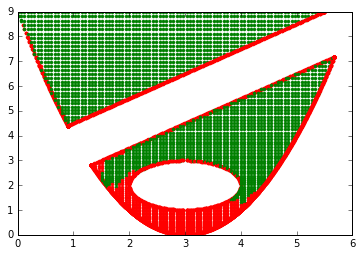

In [5]:
for m1 in np.linspace(0,6,100):
    for m2 in np.linspace(0,3,100):
        system.set_action([m1,m2])
        pred = models.f_cons.predict_cons(system)
        system.execute_action()
        if pred <0.5:
            color = 'green'
        else:
            color = 'red'
        plt.plot(system.sensor_out[0],system.sensor_out[1],'.',c = color)

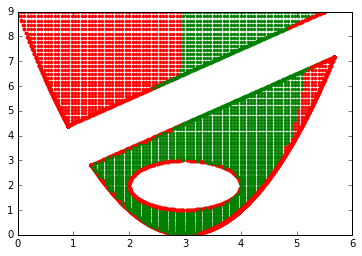

In [6]:
for m1 in np.linspace(0,6,100):
    for m2 in np.linspace(3,6,100):
        system.set_action([m1,m2])
        pred = models.f_cons.predict_cons(system)
        system.execute_action()
        if pred <0.5:
            color = 'green'
        else:
            color = 'red'
        plt.plot(system.sensor_out[0],system.sensor_out[1],'.',c = color)

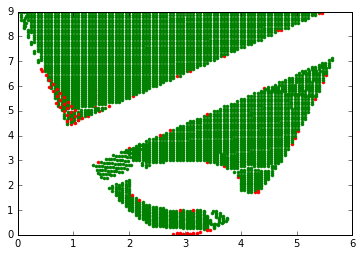

In [7]:
for s1 in np.linspace(0,6,100):
    for s2 in np.linspace(0,9,100):
        system.sensor_goal = [s1,s2]
        system.set_action = models.f_sm.get_action(system)
        pred = models.f_cons.predict_cons(system)
        system.execute_action()
        if pred <0.5:
            color = 'green'
        else:
            color = 'red'
        if system.cons_out == 0:
            plt.plot(system.sensor_out[0],system.sensor_out[1],'.',c = color)